Boston City Score Dataset - EDA

In [1]:
#import libraries
import pandas as pd 
import numpy as np 

In [2]:
#read csv 
boston_cityscore = pd.read_csv('Boston_CityScore.csv')

Understanding the Data 

In [3]:
boston_cityscore.head(5)

,metric_name,score_calculated_ts,target,metric_logic,day_score,day_numerator,day_denominator,week_score,week_numerator,week_denominator,month_score,month_numerator,month_denominator,quarter_score,quarter_numerator,quarter_denominator,latest_score_flag
0,GRAFFITI ON-TIME %,2018-03-08 14:42:07,0.80,sum(numerator_value)/sum(denominator_value)/ta...,NaN,NaN,NaN,0.709459,21.0,37.0,0.650000,52.0,100.0,0.780142,88.0,141.0,0
1,311 CONSTITUENT EXPERIENCE SURVEYS,2023-10-16 07:02:57.570514,4.00,sum(numerator_value)/sum(denominator_value)/ta...,NaN,NaN,NaN,NaN,NaN,NaN,1.062500,136.0,32.0,1.030120,342.0,83.0,0
2,BPS ATTENDANCE,2022-09-24 08:55:19.001364,0.95,average(sum(numerator_value)/sum(denominator_v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896742,723926.0,848512.0,0
3,CITY SERVICES SATISFACTION SURVEYS,2023-11-30 08:12:11.230929,4.00,sum(numerator_value)/sum(denominator_value)/ta...,0.825000,33.0,10.0,0.824324,122.0,37.0,0.817164,438.0,134.0,0.766698,1607.0,524.0,0
4,SIGN INSTALLATION ON-TIME %,2023-12-14 08:12:04.799255,0.80,sum(numerator_value)/sum(denominator_value)/ta...,0.855263,13.0,19.0,1.090909,48.0,55.0,1.076389,248.0,288.0,0.820457,531.0,809.0,0


In [4]:
boston_cityscore.shape

(51335, 17)

Cleaning Data

In [75]:
bcs_subset = boston_cityscore[['metric_name', 'score_calculated_ts', 'day_score']]

In [76]:
bcs_subset['recorded_date']=bcs_subset['score_calculated_ts'].str.split(' ', expand=True)[0]

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_1079/300040374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcs_subset['recorded_date']=bcs_subset['score_calculated_ts'].str.split(' ', expand=True)[0]


In [77]:
bcs_subset= bcs_subset.drop(['score_calculated_ts'], axis=1)

In [78]:
bcs_subset

,metric_name,day_score,recorded_date
0,GRAFFITI ON-TIME %,NaN,2018-03-08
1,311 CONSTITUENT EXPERIENCE SURVEYS,NaN,2023-10-16
2,BPS ATTENDANCE,NaN,2022-09-24
3,CITY SERVICES SATISFACTION SURVEYS,0.825000,2023-11-30
4,SIGN INSTALLATION ON-TIME %,0.855263,2023-12-14
...,...,...,...
51330,311 CONSTITUENT EXPERIENCE SURVEYS,NaN,2018-03-13
51331,GRAFFITI ON-TIME %,NaN,2021-10-24
51332,SIGN INSTALLATION ON-TIME %,0.795455,2021-11-02
51333,PARKS MAINTENANCE ON-TIME %,1.250000,2021-11-02


In [79]:
bcs_subset['recorded_date'] = pd.to_datetime(bcs_subset['recorded_date'])
bcs_subset['year'] = bcs_subset['recorded_date'].dt.year

In [80]:
bcs_subset.shape

(51335, 4)

In [83]:
bcs_subset=bcs_subset.drop_duplicates()

In [84]:
bcs_subset.shape

(48568, 4)

In [85]:
bcs_subset = bcs_subset.drop(bcs_subset[bcs_subset.year == 2024].index)

In [86]:
bcs_subset=bcs_subset.fillna(0)

In [87]:
bcs_subset

,metric_name,day_score,recorded_date,year
0,GRAFFITI ON-TIME %,0.000000,2018-03-08,2018
1,311 CONSTITUENT EXPERIENCE SURVEYS,0.000000,2023-10-16,2023
2,BPS ATTENDANCE,0.000000,2022-09-24,2022
3,CITY SERVICES SATISFACTION SURVEYS,0.825000,2023-11-30,2023
4,SIGN INSTALLATION ON-TIME %,0.855263,2023-12-14,2023
...,...,...,...,...
51329,LIBRARY USERS,0.000000,2020-03-26,2020
51331,GRAFFITI ON-TIME %,0.000000,2021-10-24,2021
51332,SIGN INSTALLATION ON-TIME %,0.795455,2021-11-02,2021
51333,PARKS MAINTENANCE ON-TIME %,1.250000,2021-11-02,2021


In [88]:
bcs_yearly_data = bcs_subset.groupby(['metric_name', 'year'], as_index=False)['day_score'].count()

In [89]:
bcs_subset.groupby(['metric_name', 'year'], as_index=False)['day_score'].count()

,metric_name,year,day_score
0,311 CALL CENTER PERFORMANCE,2018,347
1,311 CALL CENTER PERFORMANCE,2019,363
2,311 CALL CENTER PERFORMANCE,2020,367
3,311 CALL CENTER PERFORMANCE,2021,363
4,311 CALL CENTER PERFORMANCE,2022,347
...,...,...,...
132,TREE MAINTENANCE ON-TIME %,2019,360
133,TREE MAINTENANCE ON-TIME %,2020,368
134,TREE MAINTENANCE ON-TIME %,2021,362
135,TREE MAINTENANCE ON-TIME %,2022,350


In [90]:
bcs_yearly_data=bcs_yearly_data.rename({'day_score':'count_recorded_days'}, axis=1)

In [91]:
bcs_yearly_data

,metric_name,year,count_recorded_days
0,311 CALL CENTER PERFORMANCE,2018,347
1,311 CALL CENTER PERFORMANCE,2019,363
2,311 CALL CENTER PERFORMANCE,2020,367
3,311 CALL CENTER PERFORMANCE,2021,363
4,311 CALL CENTER PERFORMANCE,2022,347
...,...,...,...
132,TREE MAINTENANCE ON-TIME %,2019,360
133,TREE MAINTENANCE ON-TIME %,2020,368
134,TREE MAINTENANCE ON-TIME %,2021,362
135,TREE MAINTENANCE ON-TIME %,2022,350


In [ ]:
#bcs_yearly_data[bcs_yearly_data['count_recorded_days'] > 366]

In [93]:
bcs_good_score = bcs_subset.query("day_score >= 1.0").groupby(['metric_name', 'year'], as_index=False)['day_score'].count()

In [94]:
bcs_bad_score = bcs_subset.query("day_score < 1.0").groupby(['metric_name', 'year'], as_index=False)['day_score'].count()

In [95]:
bcs_yearly_data=bcs_yearly_data.merge(bcs_good_score, on = ['metric_name', 'year'], how='left')

In [96]:
bcs_yearly_data=bcs_yearly_data.merge(bcs_bad_score, on = ['metric_name', 'year'], how='left')

In [97]:
bcs_yearly_data=bcs_yearly_data.fillna(0.0)

In [98]:
bcs_yearly_data

,metric_name,year,count_recorded_days,day_score_x,day_score_y
0,311 CALL CENTER PERFORMANCE,2018,347,219.0,128
1,311 CALL CENTER PERFORMANCE,2019,363,142.0,221
2,311 CALL CENTER PERFORMANCE,2020,367,100.0,267
3,311 CALL CENTER PERFORMANCE,2021,363,37.0,326
4,311 CALL CENTER PERFORMANCE,2022,347,28.0,319
...,...,...,...,...,...
132,TREE MAINTENANCE ON-TIME %,2019,360,210.0,150
133,TREE MAINTENANCE ON-TIME %,2020,368,179.0,189
134,TREE MAINTENANCE ON-TIME %,2021,362,207.0,155
135,TREE MAINTENANCE ON-TIME %,2022,350,172.0,178


In [106]:
bcs_yearly_data=bcs_yearly_data.rename(columns={'day_score_x':'good_score', 'day_score_y':'bad_score'})

In [108]:
bcs_yearly_data['perc_performance_bad'] = bcs_yearly_data['bad_score']/bcs_yearly_data['count_recorded_days']
bcs_yearly_data['perc_performance_good'] = bcs_yearly_data['good_score']/bcs_yearly_data['count_recorded_days']

In [109]:
bcs_yearly_data

,metric_name,year,count_recorded_days,good_score,bad_score,perc_performance_bad,perc_performance_good
0,311 CALL CENTER PERFORMANCE,2018,347,219.0,128,0.368876,0.631124
1,311 CALL CENTER PERFORMANCE,2019,363,142.0,221,0.608815,0.391185
2,311 CALL CENTER PERFORMANCE,2020,367,100.0,267,0.727520,0.272480
3,311 CALL CENTER PERFORMANCE,2021,363,37.0,326,0.898072,0.101928
4,311 CALL CENTER PERFORMANCE,2022,347,28.0,319,0.919308,0.080692
...,...,...,...,...,...,...,...
132,TREE MAINTENANCE ON-TIME %,2019,360,210.0,150,0.416667,0.583333
133,TREE MAINTENANCE ON-TIME %,2020,368,179.0,189,0.513587,0.486413
134,TREE MAINTENANCE ON-TIME %,2021,362,207.0,155,0.428177,0.571823
135,TREE MAINTENANCE ON-TIME %,2022,350,172.0,178,0.508571,0.491429


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# how many days a year on an average a metric is recorded 
mean_recorded = bcs_yearly_data['count_recorded_days'].mean()

In [114]:
# how many days a year on an average a metric gets good score
mean_good = bcs_yearly_data['good_score'].mean()

In [115]:
mean_good

138.73722627737226

In [116]:
mean_recorded

351.3211678832117

In [131]:
df_good_heatmap = bcs_yearly_data.pivot(index="metric_name", columns="year", values="good_score")
df_bad_heatmap = bcs_yearly_data.pivot(index="metric_name", columns="year", values="bad_score")

<Axes: xlabel='year', ylabel='metric_name'>

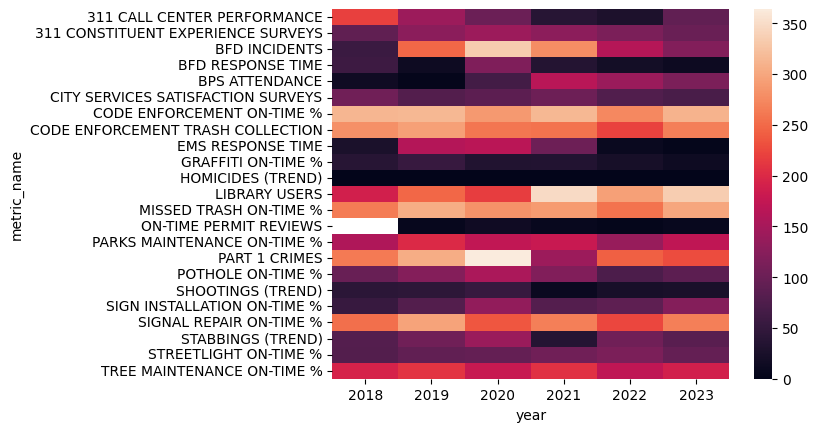

In [129]:
sns.heatmap(df_good_heatmap)

<Axes: xlabel='year', ylabel='metric_name'>

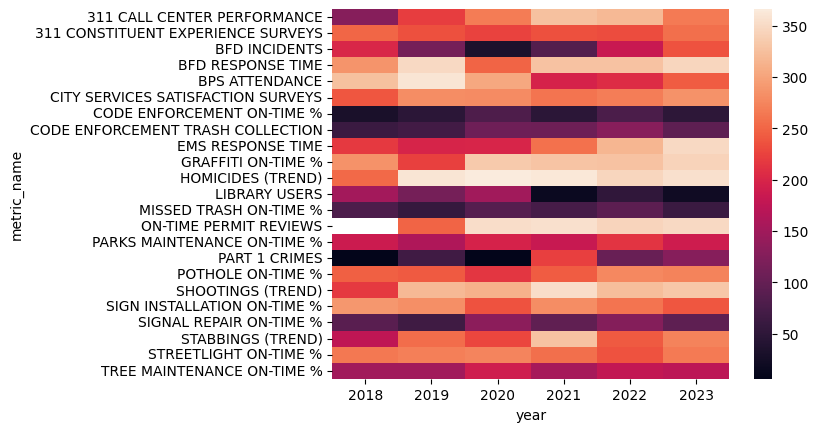

In [132]:
sns.heatmap(df_bad_heatmap)